# 数据预处理

In [2]:
import pandas
titanic = pandas.read_csv('titanic_train.csv')
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


- 缺失值填充

In [9]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


- 字符型变量转为数值型变量

In [10]:
print(titanic['Sex'].unique())
titanic.loc[titanic['Sex'] == 'male','Sex'] = 0
titanic.loc[titanic['Sex'] == 'female','Sex'] = 1

['male' 'female']


In [11]:
print(titanic['Embarked'].unique())     #登船地点
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked'] == 'S','Embarked'] = 0
titanic.loc[titanic['Embarked'] == 'C','Embarked'] = 1
titanic.loc[titanic['Embarked'] == 'Q','Embarked'] = 2

['S' 'C' 'Q' nan]


# 线性回归

In [12]:
#导入线性回归
from sklearn.linear_model import LinearRegression
#导入交叉验证
from sklearn.cross_validation import KFold
#待使用特征
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']

#实例化对象
alg = LinearRegression()
#划分交叉验证数据，返回值为train和validation的行索引
kf = KFold(titanic.shape[0],n_folds=3,random_state=1)
#存储预测结果
predictions = []

for train,validation in kf:
    #训练集自变量
    train_predictors = (titanic[predictors].iloc[train,:])
    #训练集标签
    train_target = titanic['Survived'].iloc[train]
    #训练模型
    alg.fit(train_predictors,train_target)
    #在测试集上做预测
    test_predictions = alg.predict(titanic[predictors].iloc[validation,:])
    predictions.append(test_predictions)

D:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [13]:
print(predictions)    #预测结果包括三个numpy.array

[array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
        5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
        5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
        1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
        1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
        2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
        5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
        6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
        6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
        1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
        4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
        7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
        6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
        9.02668258e-01, 

In [14]:
import numpy as np
predictions = np.concatenate(predictions,axis = 0)    #拼接

#将连续值映射到0，1
predictions[predictions > 0.5] = 1
predictions[predictions <= .5] = 0
print(predictions)


[0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.

In [15]:
accuracy = sum(predictions[predictions == titanic['Survived']]) / len(predictions)
print(accuracy)

0.2615039281705948


# 逻辑回归

In [16]:
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
#实例化对象
alg = LogisticRegression(random_state=1)
#计算所有交叉验证集的accuracy score
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv = 3)
print(scores.mean())

0.7878787878787877


# 随机森林分类器

In [19]:
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']
# n_estimators 决策树棵数
# min_samples_split 需要划分的最少行数
# min_samples_leaf 叶节点最少包含样本数
alg = RandomForestClassifier(random_state=1,n_estimators=10,min_samples_split=2,min_samples_leaf=1)

kf = cross_validation.KFold(titanic.shape[0],3,random_state = 1)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean())    #平均准确率

0.7856341189674523


- 超参数调节

In [22]:
alg = RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=4,min_samples_leaf=2)
kf = cross_validation.KFold(titanic.shape[0],3,random_state=1)
scores = cross_validation.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean())

0.8159371492704826


In [23]:
#生成变量FamilySize = 兄弟姐妹数 + 老人小孩数
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch']

#生成变量名字长度
titanic['NameLength'] = titanic['Name'].apply(lambda x:len(x))

In [24]:
import re
#正则表达式从姓名中抽取头衔
def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ''

titles = titanic['Name'].apply(get_title)
print(pandas.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Mme           1
Don           1
Ms            1
Countess      1
Jonkheer      1
Capt          1
Sir           1
Lady          1
Name: Name, dtype: int64


In [28]:
# 每个title用一个整数匹配
title_mapping = {'Mr':1,'Miss':2,'Mrs':3,'Ms':3,'Master':4,'Dr':5,'Rev':6,'Major':7,'Col':7,'Mlle':8,'Mme':8,'Don':9,'Lady':10,'Countess':11,'Jonkheer':12,'Capt':13,'Sir':1}
for k,v in title_mapping.items():
    titles[titles == k] = v
    
print(pandas.value_counts(titles))
titanic['Title'] = titles

1     518
2     182
3     126
4      40
5       7
6       6
7       4
8       3
13      1
12      1
11      1
10      1
9       1
Name: Name, dtype: int64


# 随机森林特征重要性排序

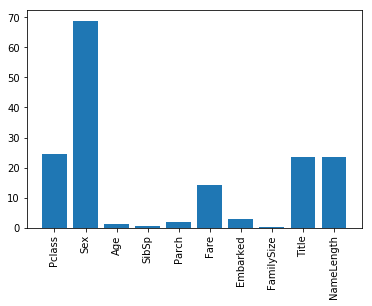

In [30]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked','FamilySize','Title','NameLength']

selector = SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic['Survived'])
#将原始p-value转化为得分
scores = -np.log10(selector.pvalues_)

plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()

# 集成算法

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
#待集成的算法
algorithms = [
    [GradientBoostingClassifier(random_state=1,n_estimators=25,max_depth=3),['Pclass','Sex','Age','Fare','Embarked','FamilySize']],
    [LogisticRegression(random_state=1),['Pclass','Sex','Age','FamilySize','Fare','Embarked','Title']]
]

kf = KFold(titanic.shape[0],n_folds=3,random_state=1)

predictions = []
for train,validation in kf:
    train_target = titanic['Survived'].iloc[train]
    full_test_predictions = []
    for alg,predictors in algorithms:
        alg.fit(titanic[predictors].iloc[train,:],train_target)
        test_predictions = alg.predict_proba(titanic[predictors].iloc[validation,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
        
    #简单的集成策略：取预测值的平均得到最终分类
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)
    
predictions = np.concatenate(predictions,axis = 0)

accuracy = sum(predictions[predictions == titanic['Survived']]) / len(predictions)
print(accuracy)

0.2738496071829405
